# Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train= pd.read_csv('train_preprocessed.csv') 
test= pd.read_csv('test_preprocessed.csv') 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

In [4]:
X_train = train.drop(columns=['DiagPeriodL90D'])  # Features (excluding target)
y_train = train['DiagPeriodL90D']  # Target column

# Split train dataset into 90% training and 10% validation
X_train_90, X_val_10, y_train_90, y_val_10 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# test data is being a little tricky, so you need to do more with it to make it play nice
X_test = test.copy()

for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0 

X_test = X_test[X_train.columns]

Random Forest Performance:
Accuracy: 0.6012861736334405
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       496
           1       0.60      1.00      0.75       748

    accuracy                           0.60      1244
   macro avg       0.30      0.50      0.38      1244
weighted avg       0.36      0.60      0.45      1244



/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


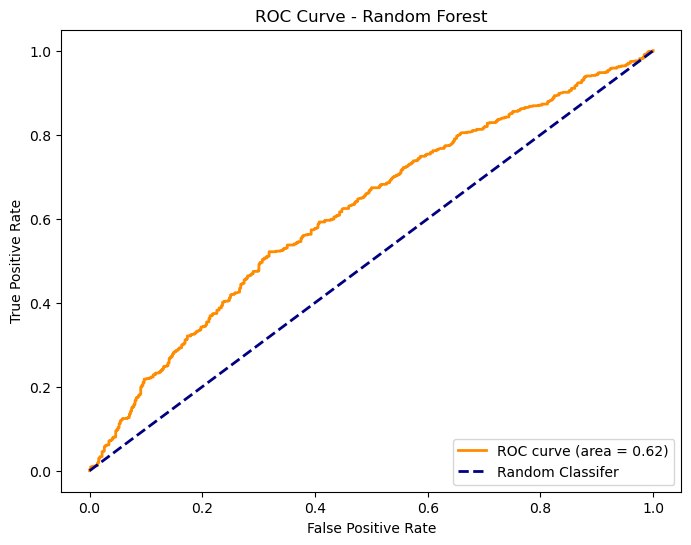

In [5]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train_90, y_train_90)

y_val_pred = rf.predict(X_val_10)

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_val_10, y_val_pred))
print("Classification Report:\n", classification_report(y_val_10, y_val_pred))

y_val_proba = rf.predict_proba(X_val_10)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val_10, y_val_proba)
roc_auc = auc(fpr, tpr)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifer")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


Decision Tree Performance:
Accuracy: 0.5860128617363344
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.19      0.27       496
           1       0.61      0.85      0.71       748

    accuracy                           0.59      1244
   macro avg       0.53      0.52      0.49      1244
weighted avg       0.55      0.59      0.53      1244



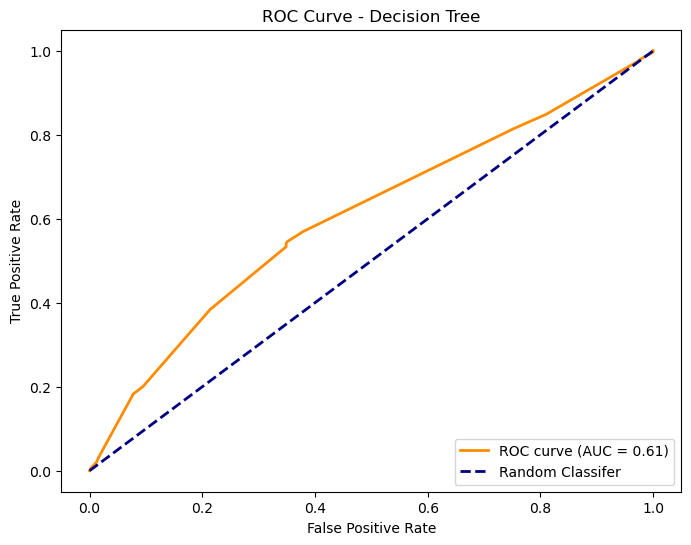

In [6]:
# Decision Tree

dt = DecisionTreeClassifier(max_depth=5, random_state=42)

dt.fit(X_train_90, y_train_90)

y_val_pred = dt.predict(X_val_10)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_val_10, y_val_pred)}")
print("Classification Report:\n", classification_report(y_val_10, y_val_pred))

y_val_proba = dt.predict_proba(X_val_10)[:, 1]  


# ROC curve
fpr, tpr, thresholds = roc_curve(y_val_10, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifer")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()

test_pred = dt.predict(X_test)

test_proba = dt.predict_proba(X_test)[:, 1]

test_pred_df = pd.DataFrame({
    'predicted_class': test_pred,
    'predicted_proba': test_proba
})


Logistic Regression Performance:
Accuracy: 0.6004823151125402
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       496
           1       0.60      1.00      0.75       748

    accuracy                           0.60      1244
   macro avg       0.30      0.50      0.38      1244
weighted avg       0.36      0.60      0.45      1244



/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


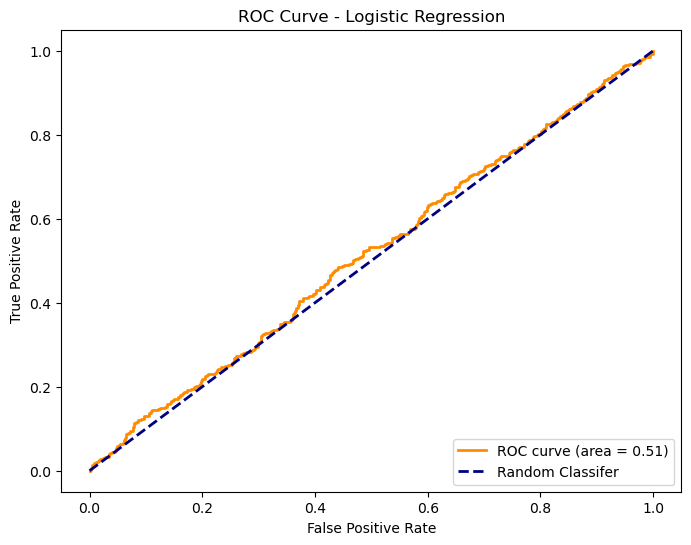

In [7]:
#Logistic Regression model

X_train_90, X_val_10, y_train_90, y_val_10 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_90, y_train_90)

y_val_pred = logreg.predict(X_val_10)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_val_10, y_val_pred))
print("Classification Report:\n", classification_report(y_val_10, y_val_pred))

y_val_proba = logreg.predict_proba(X_val_10)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val_10, y_val_proba)
roc_auc = auc(fpr, tpr)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifer")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

test_pred = logreg.predict(X_test)

test_pred_df = pd.DataFrame(test_pred, columns=['predicted_target'])